In [2]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
def load_data(data_path):
    # replace with your folder's path
    folder_path = r"D:/Task/State_data/"

    all_files = os.listdir(folder_path)

    # Filter out non-CSV files
    csv_files = [f for f in all_files if f.endswith('.csv')]

    # Create a list to hold the dataframes
    df_list = []

    for csv in csv_files:
        file_path = os.path.join(folder_path, csv)
        try:
            # Try reading the file using default UTF-8 encoding
            df = pd.read_csv(file_path)
            df_list.append(df)
        except UnicodeDecodeError:
            try:
                # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
                df = pd.read_csv(file_path, encoding='cp1252')
                df_list.append(df)
            except Exception as e:
                print(f"Could not read file {csv} because of error: {e}")
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")

    # Concatenate all data into one DataFrame
    big_df = pd.concat(df_list, ignore_index=True)
    
    # Save the final result to a new CSV file
    # big_df.to_csv(os.path.join(folder_path, 'combined.csv'), index=False)

    return pd.read_csv(data_path)


In [4]:
df=pd.read_csv(r"D:\Task\State_data\combined.csv")

In [5]:
df

State Code District Code                India/States Division Group  \
0             `07          `000        STATE - NCT OF DELHI      `00  `000   
1             `07          `000        STATE - NCT OF DELHI      `01  `000   
2             `07          `000        STATE - NCT OF DELHI      `01  `011   
3             `07          `000        STATE - NCT OF DELHI      `01  `011   
4             `07          `000        STATE - NCT OF DELHI      `01  `011   
...           ...           ...                         ...      ...   ...   
162113        `19          `345  District - Purba Medinipur      `99  `990   
162114        `19          `345  District - Purba Medinipur      `99  `991   
162115        `19          `345  District - Purba Medinipur      `99  `991   
162116        `19          `345  District - Purba Medinipur      `99  `992   
162117        `19          `345  District - Purba Medinipur      `99  `992   

        Class                                           NIC Name  \
0       `0000                                              Total   
1       `0000  Crop and animal production, hunting and relate...   
2       `0000                     Growing of non-perennial crops   
3       `0111  Growing of cereals (except rice), leguminous c...   
4       `0112                                    Growing of rice   
...       ...                                                ...   
162113  `9900  Activities of extraterritorial organizations a...   
162114  `0000                                              Blank   
162115  `9910                                              Blank   
162116  `0000          Incomplete description/ Wrongly Classifed   
162117  `9920          Incomplete description/ Wrongly Classifed   

        Main Workers - Total -  Persons  Main Workers - Total - Males  \
0                                828980                        708129   
1                                  1484                          1271   
2                                   169                           151   
3                                    83                            81   
4                                     9                             9   
...                                 ...                           ...   
162113                               18                            12   
162114                             8244                          5866   
162115                             8244                          5866   
162116                             8324                          4604   
162117                             8324                          4604   

        Main Workers - Total - Females  ...  Main Workers - Urban - Females  \
0                               120851  ...                          117709   
1                                  213  ...                             162   
2                                   18  ...                              16   
3                                    2  ...                               0   
4                                    0  ...                               0   
...                                ...  ...                             ...   
162113                               6  ...                               6   
162114                            2378  ...                             876   
162115                            2378  ...                             876   
162116                            3720  ...                             932   
162117                            3720  ...                             932   

        Marginal Workers - Total -  Persons  Marginal Workers - Total - Males  \
0                                     61009                             44743   
1                                       224                               150   
2                                        92                                65   
3                                        37                                27   
4                     

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162118 entries, 0 to 162117
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           162118 non-null  object
 1   District Code                        162118 non-null  object
 2   India/States                         162118 non-null  object
 3   Division                             162118 non-null  object
 4   Group                                162118 non-null  object
 5   Class                                162118 non-null  object
 6   NIC Name                             162118 non-null  object
 7   Main Workers - Total -  Persons      162118 non-null  int64 
 8   Main Workers - Total - Males         162118 non-null  int64 
 9   Main Workers - Total - Females       162118 non-null  int64 
 10  Main Workers - Rural -  Persons      162118 non-null  int64 
 11  Main Workers - Rural - Mal

In [7]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

In [8]:
df.describe().T

count         mean           std  min  \
Main Workers - Total -  Persons      162118.0  1317.802835  43827.829104  0.0   
Main Workers - Total - Males         162118.0  1038.216114  35944.282054  0.0   
Main Workers - Total - Females       162118.0   279.586721   8534.270729  0.0   
Main Workers - Rural -  Persons      162118.0   556.616242  18881.062208  0.0   
Main Workers - Rural - Males         162118.0   428.815357  15170.258217  0.0   
Main Workers - Rural - Females       162118.0   127.800886   4110.903186  0.0   
Main Workers - Urban -  Persons      162118.0   761.186592  25545.346110  0.0   
Main Workers - Urban - Males         162118.0   609.400757  21231.221309  0.0   
Main Workers - Urban - Females       162118.0   151.785835   4657.799451  0.0   
Marginal Workers - Total -  Persons  162118.0   315.088911  11106.439744  0.0   
Marginal Workers - Total - Males     162118.0   164.384510   5595.760231  0.0   
Marginal Workers - Total - Females   162118.0   150.704400   5776.918390  0.0   
Marginal Workers - Rural -  Persons  162118.0   205.142625   7291.015438  0.0   
Marginal Workers - Rural - Males     162118.0   100.940599   3494.230556  0.0   
Marginal Workers - Rural - Females   162118.0   104.202026   3989.486971  0.0   
Marginal Workers - Urban -  Persons  162118.0   109.946286   3990.870907  0.0   
Marginal Workers - Urban - Males     162118.0    63.443911   2182.970737  0.0   
Marginal Workers - Urban - Females   162118.0    46.502375   1902.958190  0.0   

                                     25%   50%    75%         max  
Main Workers - Total -  Persons      6.0  24.0  153.0  15619759.0  
Main Workers - Total - Males         4.0  20.0  118.0  12801403.0  
Main Workers - Total - Females       0.0   2.0   22.0   2818356.0  
Main Workers - Rural -  Persons      1.0   8.0   58.0   6770444.0  
Main Workers - Rural - Males         0.0   6.0   44.0   5446541.0  
Main Workers - Rural - Females       0.0   0.0    8.0   1323903.0  
Main Workers - Urban -  Persons      2.0  10.0   68.0   8849315.0  
Main Workers - Urban - Males         0.0   8.0   53.0   7354862.0  
Main Workers - Urban - Females       0.0   0.0   10.0   1494453.0  
Marginal Workers - Total -  Persons  0.0   3.0   24.0   3834122.0  
Marginal Workers - Total - Males     0.0   2.0   15.0   1966750.0  
Marginal Workers - Total - Females   0.0   0.0    6.0   1867372.0  
Marginal Workers - Rural -  Persons  0.0   1.0   12.0   2515182.0  
Marginal Workers - Rural - Males     0.0   0.0    6.0   1223824.0  
Marginal Workers - Rural - Females   0.0   0.0    2.0   1291358.0  
Marginal Workers - Urban -  Persons  0.0   0.0    8.0   1318940.0  
Marginal Workers - Urban - Males     0.0   0.0    6.0    742926.0  
Marginal Workers - Urban - Females   0.0   0.0    2.0    576014.0

In [9]:
df.columns

Index(['State Code', 'District Code', 'India/States', 'Division', 'Group',
       'Class', 'NIC Name', 'Main Workers - Total -  Persons',
       'Main Workers - Total - Males', 'Main Workers - Total - Females',
       'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males',
       'Main Workers - Rural - Females', 'Main Workers - Urban -  Persons',
       'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
       'Marginal Workers - Total -  Persons',
       'Marginal Workers - Total - Males',
       'Marginal Workers - Total - Females',
       'Marginal Workers - Rural -  Persons',
       'Marginal Workers - Rural - Males',
       'Marginal Workers - Rural - Females',
       'Marginal Workers - Urban -  Persons',
       'Marginal Workers - Urban - Males',
       'Marginal Workers - Urban - Females'],
      dtype='object')

In [10]:
df["State Code"].unique()

array(['`07', '`16', '`20', '`24', '`27', '`29', '`30', '`32', '`33',
       '`34', '`02', '`05', '`09', '`10', '`11', '`13', '`18', '`21',
       '`15', '`19'], dtype=object)

In [11]:
df.describe()

Main Workers - Total -  Persons  Main Workers - Total - Males  \
count                     1.621180e+05                  1.621180e+05   
mean                      1.317803e+03                  1.038216e+03   
std                       4.382783e+04                  3.594428e+04   
min                       0.000000e+00                  0.000000e+00   
25%                       6.000000e+00                  4.000000e+00   
50%                       2.400000e+01                  2.000000e+01   
75%                       1.530000e+02                  1.180000e+02   
max                       1.561976e+07                  1.280140e+07   

       Main Workers - Total - Females  Main Workers - Rural -  Persons  \
count                    1.621180e+05                     1.621180e+05   
mean                     2.795867e+02                     5.566162e+02   
std                      8.534271e+03                     1.888106e+04   
min                      0.000000e+00                     0.000000e+00   
25%                      0.000000e+00                     1.000000e+00   
50%                      2.000000e+00                     8.000000e+00   
75%                      2.200000e+01                     5.800000e+01   
max                      2.818356e+06                     6.770444e+06   

       Main Workers - Rural - Males  Main Workers - Rural - Females  \
count                  1.621180e+05                    1.621180e+05   
mean                   4.288154e+02                    1.278009e+02   
std                    1.517026e+04                    4.110903e+03   
min                    0.000000e+00                    0.000000e+00   
25%                    0.000000e+00                    0.000000e+00   
50%                    6.000000e+00                    0.000000e+00   
75%                    4.400000e+01                    8.000000e+00   
max                    5.446541e+06                    1.323903e+06   

       Main Workers - Urban -  Persons  Main Workers - Urban - Males  \
count                     1.621180e+05                  1.621180e+05   
mean                      7.611866e+02                  6.094008e+02   
std                       2.554535e+04                  2.123122e+04   
min                       0.000000e+00                  0.000000e+00   
25%                       2.000000e+00                  0.000000e+00   
50%                       1.000000e+01                  8.000000e+00   
75%                       6.800000e+01                  5.300000e+01   
max                       8.849315e+06                  7.354862e+06   

       Main Workers - Urban - Females  Marginal Workers - Total -  Persons  \
count                    1.621180e+05                         1.621180e+05   
mean                     1.517858e+02                         3.150889e+02   
std                      4.657799e+03                         1.110644e+04   
min                      0.000000e+00                         0.000000e+00   
25%                      0.000000e+00                         0.000000e+00   
50%                      0.000000e+00                         3.000000e+00   
75%                      1.000000e+01                         2.400000e+01   
max                      1.494453e+06                         3.834122e+06   

       Marginal Workers - Total - Males  Marginal Workers - Total - Females  \
count                      1.621180e+05                        1.621180e+05   
mean                       1.643845e+02                        1.507044e+02   
std                        5.595760e+03                        5.776918e+03   
min                        0.000000e+00                        0.000000e+00   
25%                        0.000000e+00                        0.000000e+00   
50%                        2.000000e+00                        0.000000e+00   
75%                        1.500000e+01                        6.000000e+00   
max                        1.966750e+06                        1.86

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162118 entries, 0 to 162117
Data columns (total 25 columns):
 #   Column                               Non-Null Count   Dtype 
---  ------                               --------------   ----- 
 0   State Code                           162118 non-null  object
 1   District Code                        162118 non-null  object
 2   India/States                         162118 non-null  object
 3   Division                             162118 non-null  object
 4   Group                                162118 non-null  object
 5   Class                                162118 non-null  object
 6   NIC Name                             162118 non-null  object
 7   Main Workers - Total -  Persons      162118 non-null  int64 
 8   Main Workers - Total - Males         162118 non-null  int64 
 9   Main Workers - Total - Females       162118 non-null  int64 
 10  Main Workers - Rural -  Persons      162118 non-null  int64 
 11  Main Workers - Rural - Mal

In [13]:
df.nunique()

State Code                               20
District Code                           414
India/States                            431
Division                                 89
Group                                   241
Class                                   423
NIC Name                                587
Main Workers - Total -  Persons        7203
Main Workers - Total - Males           6474
Main Workers - Total - Females         3409
Main Workers - Rural -  Persons        4751
Main Workers - Rural - Males           4278
Main Workers - Rural - Females         2272
Main Workers - Urban -  Persons        5552
Main Workers - Urban - Males           5041
Main Workers - Urban - Females         2573
Marginal Workers - Total -  Persons    3546
Marginal Workers - Total - Males       2736
Marginal Workers - Total - Females     2335
Marginal Workers - Rural -  Persons    2843
Marginal Workers - Rural - Males       2178
Marginal Workers - Rural - Females     1915
Marginal Workers - Urban -  Pers

In [14]:
df.isnull().sum()

State Code                             0
District Code                          0
India/States                           0
Division                               0
Group                                  0
Class                                  0
NIC Name                               0
Main Workers - Total -  Persons        0
Main Workers - Total - Males           0
Main Workers - Total - Females         0
Main Workers - Rural -  Persons        0
Main Workers - Rural - Males           0
Main Workers - Rural - Females         0
Main Workers - Urban -  Persons        0
Main Workers - Urban - Males           0
Main Workers - Urban - Females         0
Marginal Workers - Total -  Persons    0
Marginal Workers - Total - Males       0
Marginal Workers - Total - Females     0
Marginal Workers - Rural -  Persons    0
Marginal Workers - Rural - Males       0
Marginal Workers - Rural - Females     0
Marginal Workers - Urban -  Persons    0
Marginal Workers - Urban - Males       0
Marginal Workers

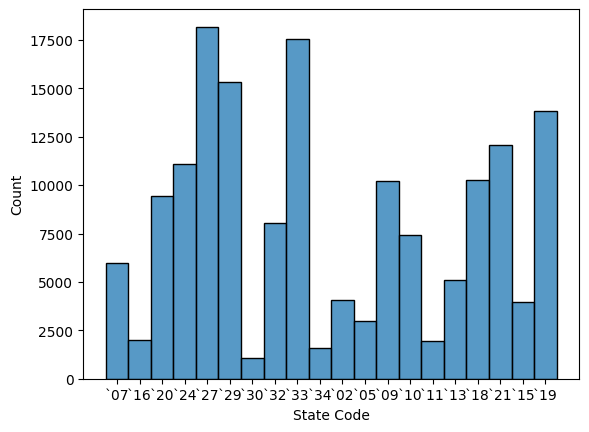

In [15]:
#Data visualization:
sns.histplot(x='State Code', data=df )
plt.show()

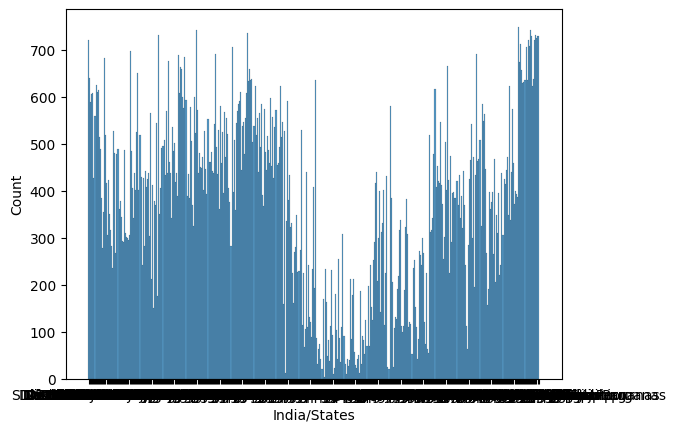

In [16]:
sns.histplot(x="India/States", data=df)
plt.show()

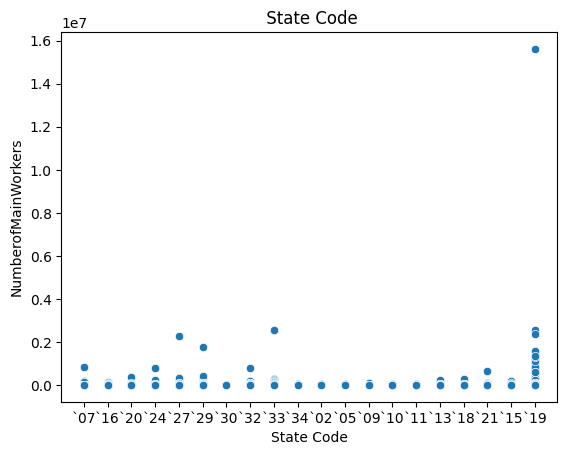

In [17]:
y_var = "Main Workers - Total -  Persons".strip()
sns.scatterplot(x='State Code', y=y_var, data=df)
plt.xlabel('State Code')
plt.ylabel('NumberofMainWorkers')
plt.title(' State Code')
plt.show()

In [18]:
df['Total_workers'] = (df['Main Workers - Total -  Persons'] + df['Marginal Workers - Total -  Persons'])

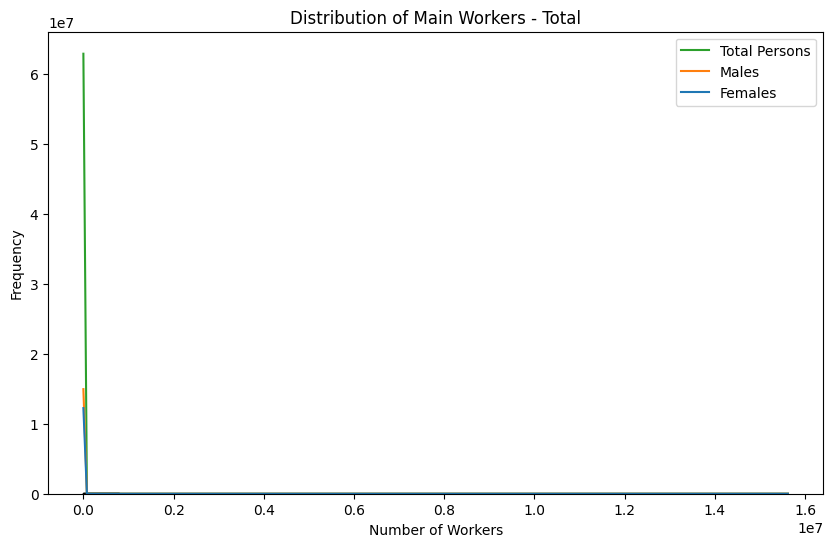

In [19]:
# Main Workers - Total -  Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total')
plt.show()

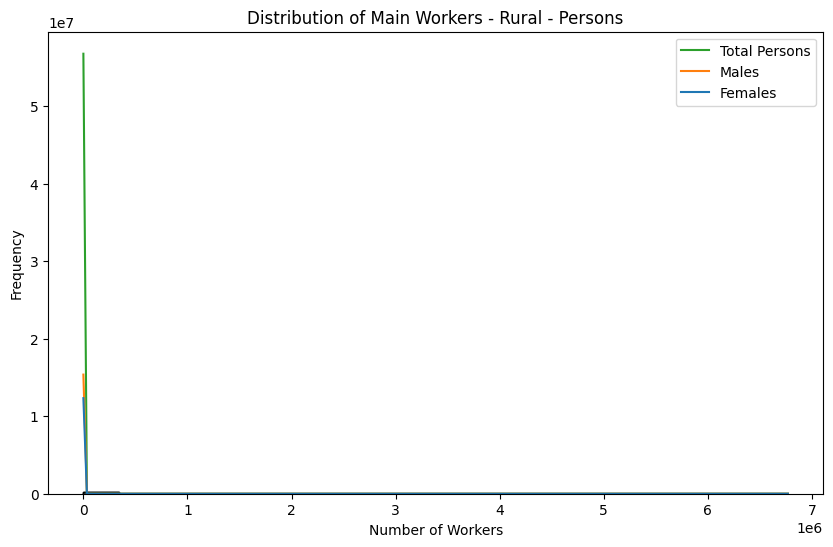

In [20]:
# Main Workers - Rural
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Rural - Persons')
plt.show()

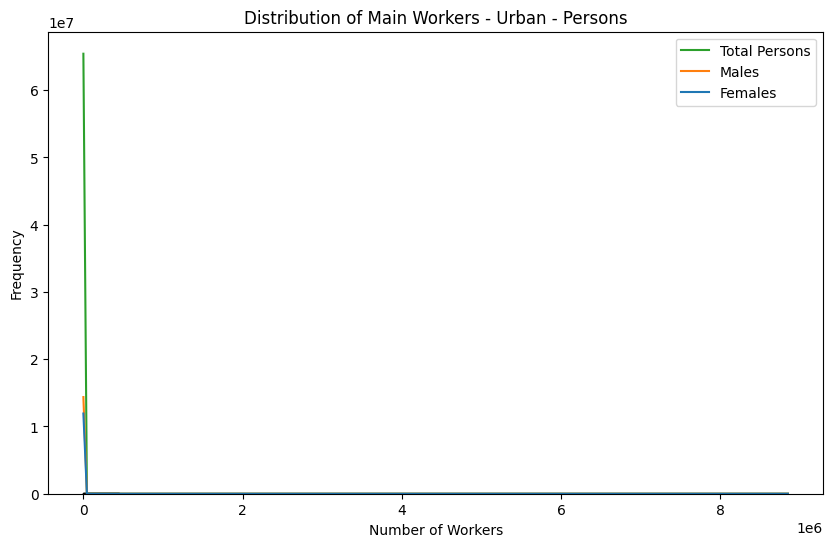

In [21]:
# Main Workers - Urban-persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Urban - Persons')
plt.show()

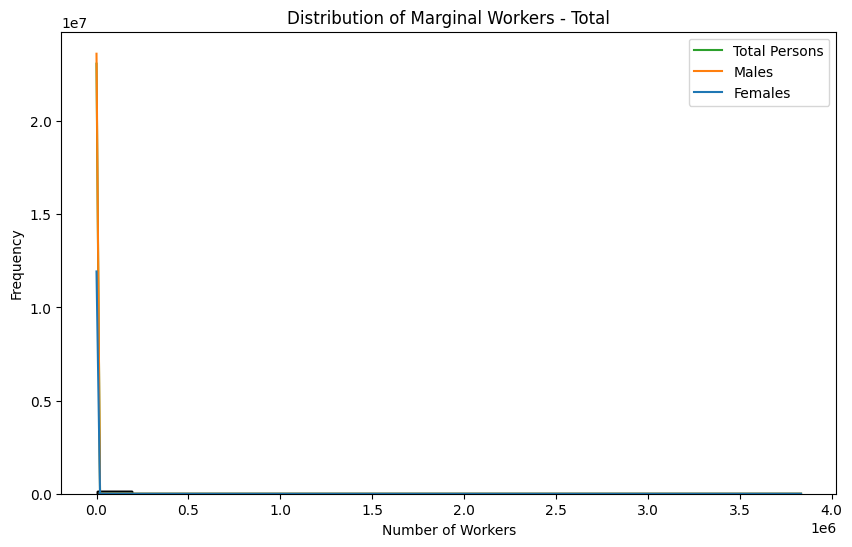

In [22]:
# Marginal Workers - Total - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Total')
plt.show()

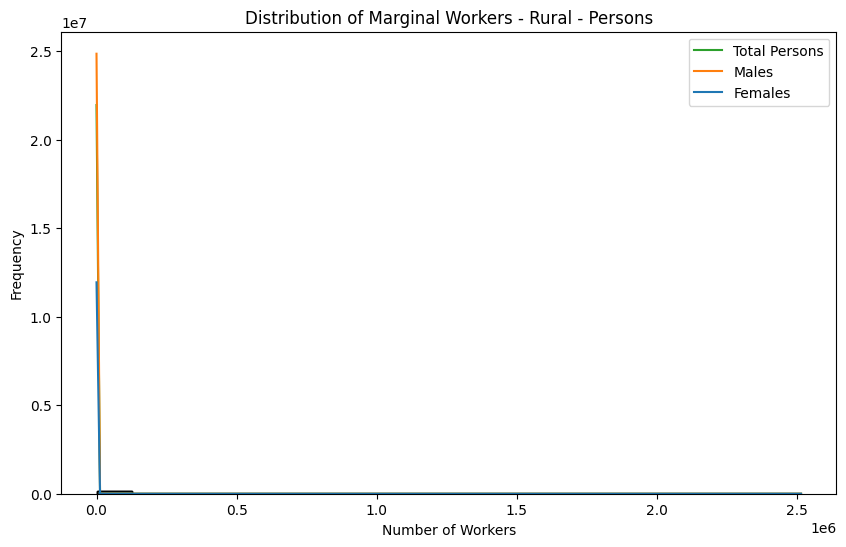

In [23]:
# Marginal Workers - Rural - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Rural - Persons')
plt.show()

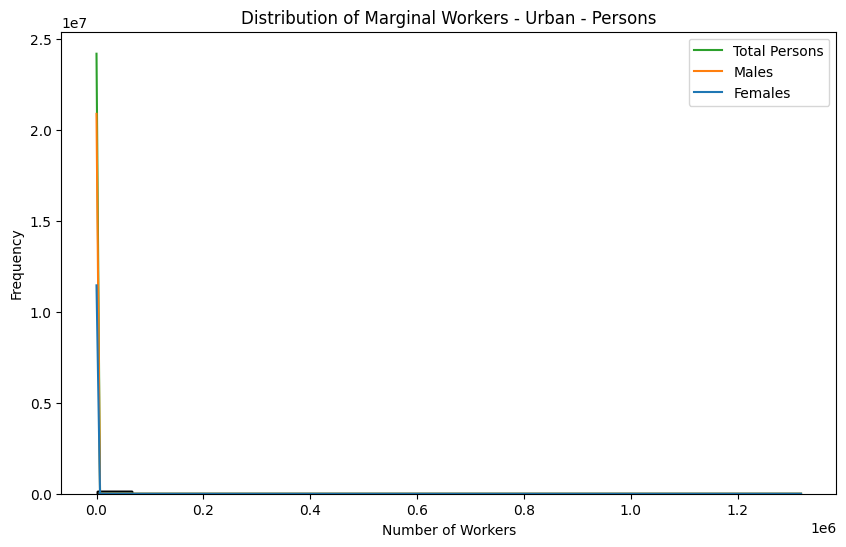

In [24]:
# Marginal Workers - Urban - Persons:
plt.figure(figsize=(10, 6))
sns.histplot(df[['Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females']], bins=20, kde=True)
plt.legend(['Total Persons', 'Males', 'Females'])
plt.xlabel('Number of Workers')
plt.ylabel('Frequency')
plt.title('Distribution of Marginal Workers - Urban - Persons')
plt.show()

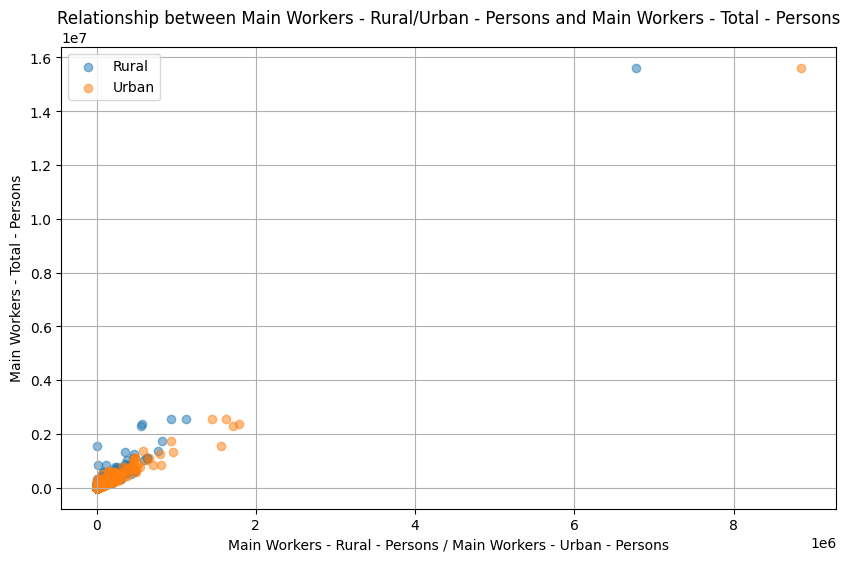

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Main Workers - Rural -  Persons'], df['Main Workers - Total -  Persons'], label='Rural', alpha=0.5)
plt.scatter(df['Main Workers - Urban -  Persons'], df['Main Workers - Total -  Persons'], label='Urban', alpha=0.5)
plt.xlabel('Main Workers - Rural - Persons / Main Workers - Urban - Persons')
plt.ylabel('Main Workers - Total - Persons')
plt.title('Relationship between Main Workers - Rural/Urban - Persons and Main Workers - Total - Persons')
plt.legend()
plt.grid(True)
plt.show()

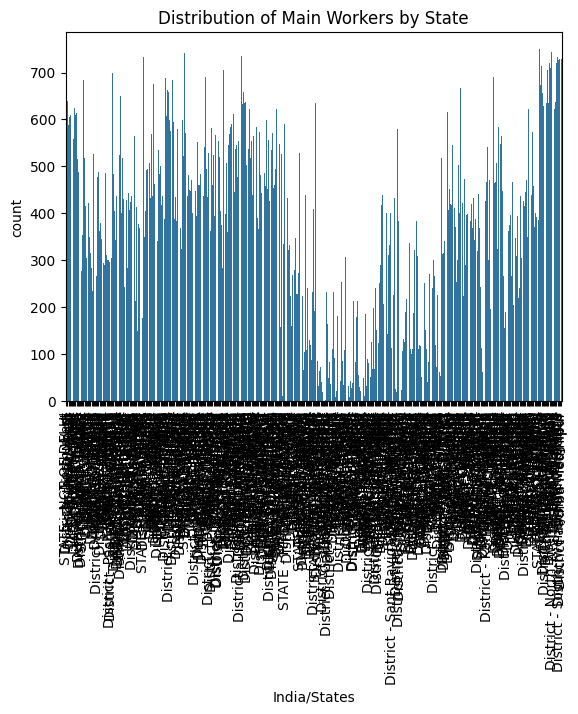

In [26]:
sns.countplot(x='India/States', data=df)
plt.xticks(rotation=90)
plt.title('Distribution of Main Workers by State')
plt.show()

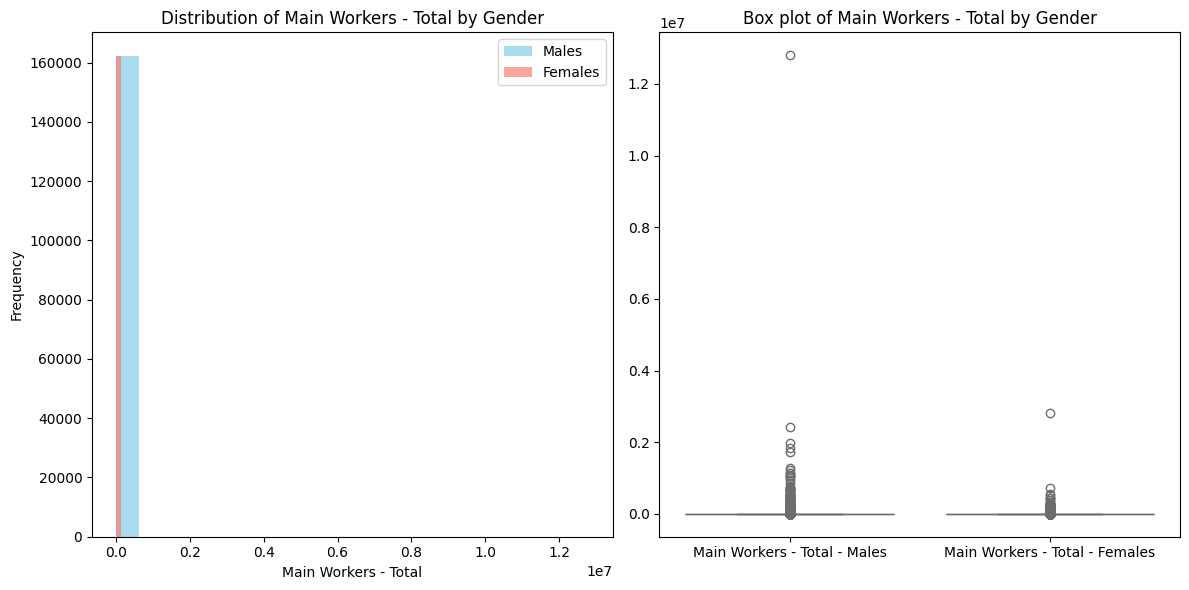

In [27]:
# Histogram for 'Main Workers - Total - Persons'
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(df['Main Workers - Total - Males'], bins=20, color='skyblue', alpha=0.7, label='Males')
plt.hist(df['Main Workers - Total - Females'], bins=20, color='salmon', alpha=0.7, label='Females')
plt.xlabel('Main Workers - Total')
plt.ylabel('Frequency')
plt.title('Distribution of Main Workers - Total by Gender')
plt.legend()

# Box plot for 'Main Workers - Total - Persons'
plt.subplot(1, 2, 2)
sns.boxplot(data=df[['Main Workers - Total - Males', 'Main Workers - Total - Females']], palette=['skyblue', 'salmon'])
plt.title('Box plot of Main Workers - Total by Gender')

plt.tight_layout()
plt.show()

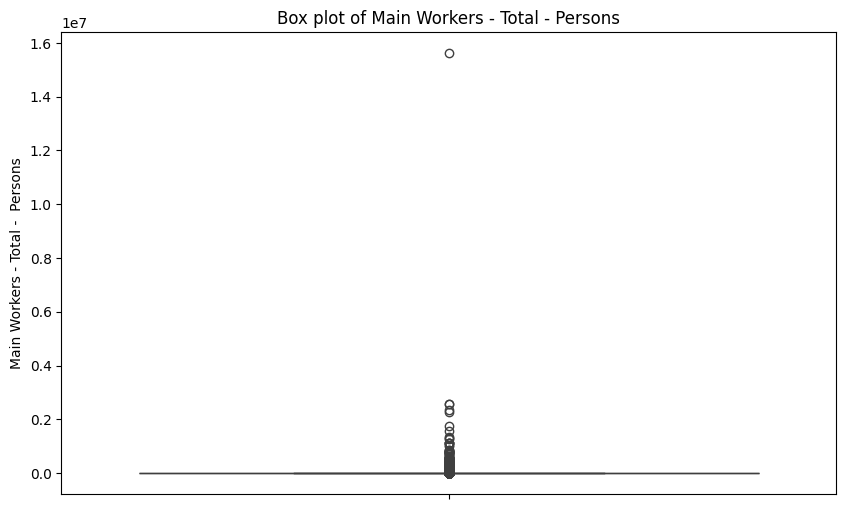

In [28]:
# Box plot for 'Main Workers - Total - Persons'
plt.figure(figsize=(10, 6))
sns.boxplot(y=df['Main Workers - Total -  Persons'])
plt.title('Box plot of Main Workers - Total - Persons')
plt.show()

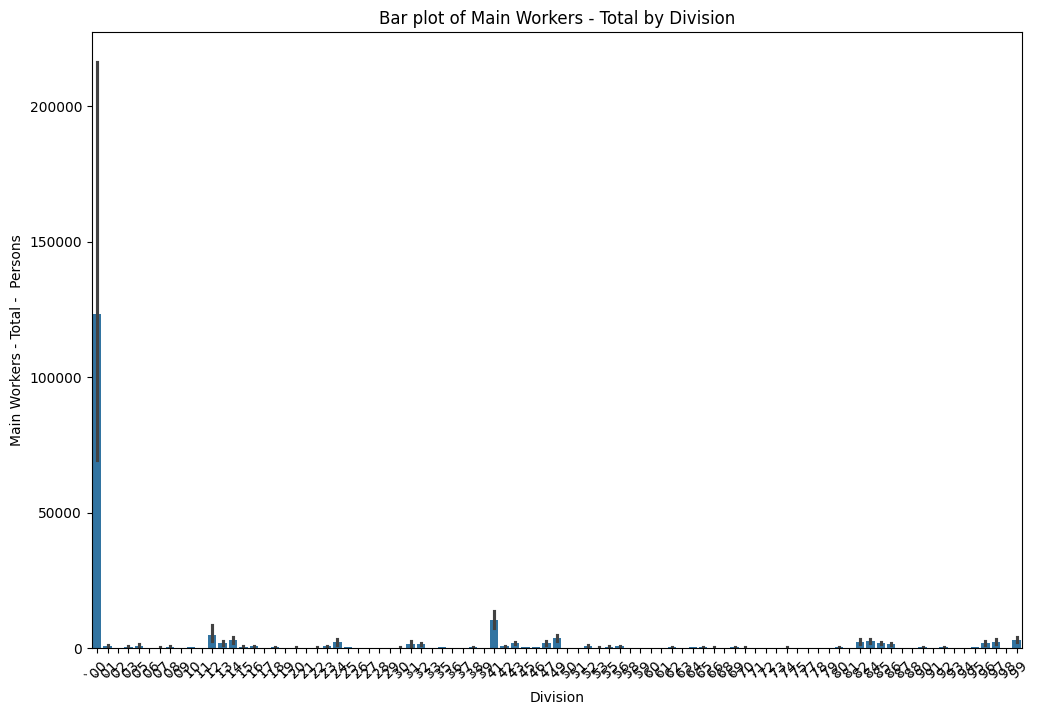

In [29]:
# Bar plot for 'Main Workers - Total' by 'Division'
plt.figure(figsize=(12, 8))
sns.barplot(x='Division', y='Main Workers - Total -  Persons', data=df)
plt.title('Bar plot of Main Workers - Total by Division')
plt.xticks(rotation=45)
plt.show()

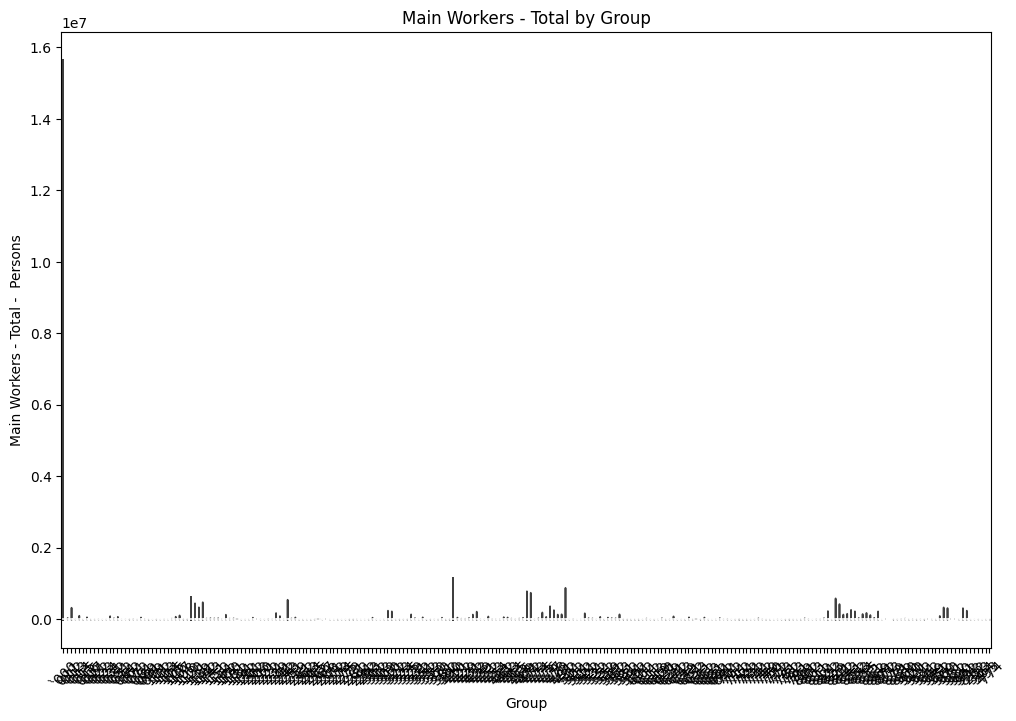

In [30]:
# Main Workers - Total' by 'Group'
plt.figure(figsize=(12, 8))
sns.violinplot(x='Group', y='Main Workers - Total -  Persons', data=df)
plt.title('Main Workers - Total by Group')
plt.xticks(rotation=45)
plt.show()

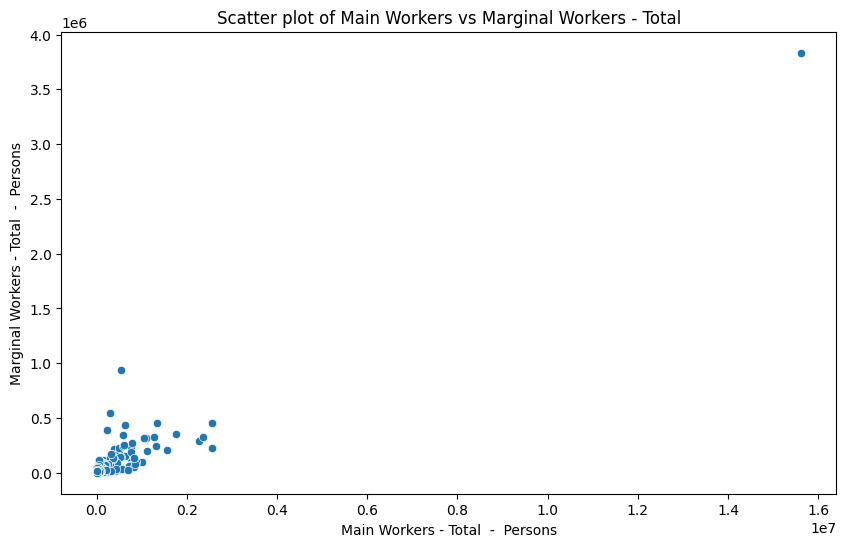

In [31]:
# Scatter plot for 'Main Workers - Total' vs 'Marginal Workers - Total'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Marginal Workers - Total -  Persons', data=df)
plt.title('Scatter plot of Main Workers vs Marginal Workers - Total')
plt.xlabel('Main Workers - Total  -  Persons')
plt.ylabel('Marginal Workers - Total  -  Persons')
plt.show()

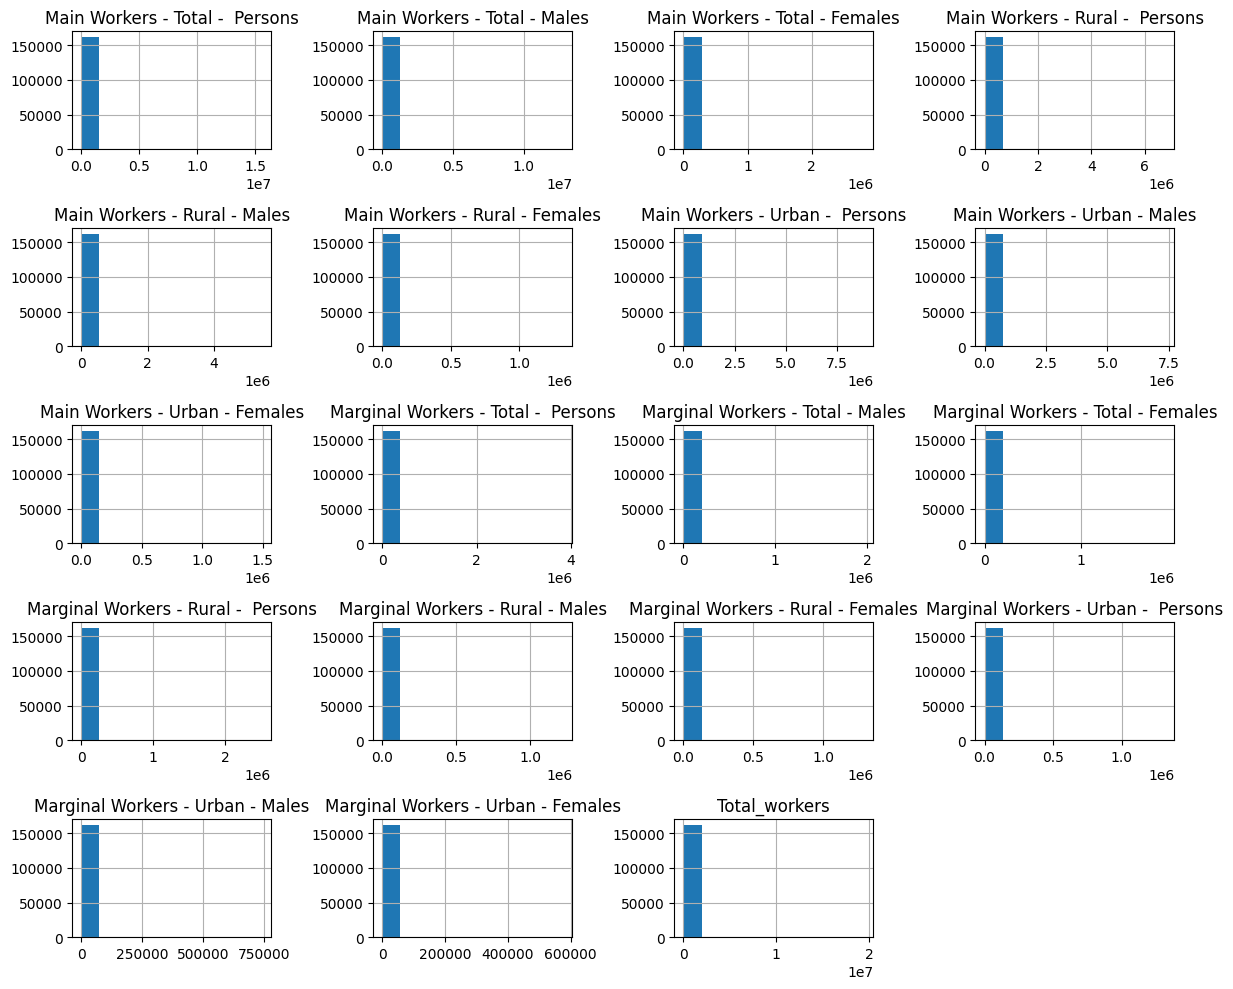

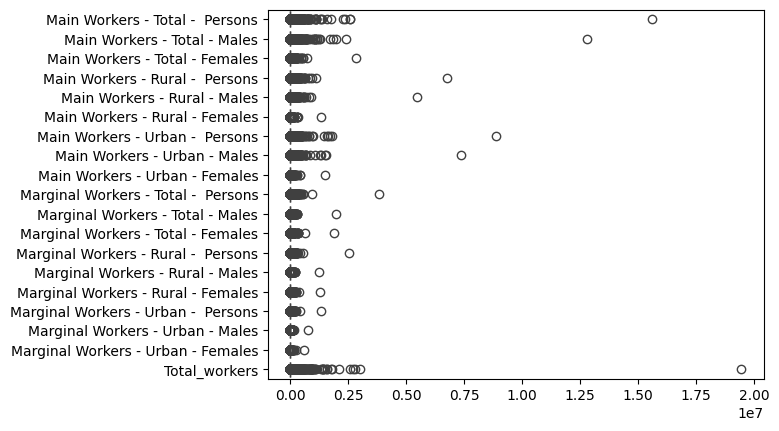

In [32]:
# Histograms for numerical columns
df.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

# Box plots for numerical columns
sns.boxplot(data=df, orient="h")
plt.show()


In [ ]:
# Scatter plot for relationship visualization
sns.pairplot(df)
plt.show()

In [33]:
# Cross-tabulation between 'Class' and 'Division'
pd.crosstab(df['Class'], df['Division'])

Division  `00   `01   `02  `03  `05  `06  `07  `08  `09   `10  ...  `90  `91  \
Class                                                          ...             
`0000     433  2195  1416  737  470  335  325  938  345  2562  ...  710  478   
`0111       0   212     0    0    0    0    0    0    0     0  ...    0    0   
`0112       0   159     0    0    0    0    0    0    0     0  ...    0    0   
`0113       0   197     0    0    0    0    0    0    0     0  ...    0    0   
`0114       0    57     0    0    0    0    0    0    0     0  ...    0    0   
...       ...   ...   ...  ...  ...  ...  ...  ...  ...   ...  ...  ...  ...   
`9810       0     0     0    0    0    0    0    0    0     0  ...    0    0   
`9820       0     0     0    0    0    0    0    0    0     0  ...    0    0   
`9900       0     0     0    0    0    0    0    0    0     0  ...    0    0   
`9910       0     0     0    0    0    0    0    0    0     0  ...    0    0   
`9920       0     0     0    0    0    0    0    0    0     0  ...    0    0   

Division  `92  `93   `94   `95  `96  `97  `98   `99  
Class                                                
`0000     196  726  1009  1033  766  750  218  1345  
`0111       0    0     0     0    0    0    0     0  
`0112       0    0     0     0    0    0    0     0  
`0113       0    0     0     0    0    0    0     0  
`0114       0    0     0     0    0    0    0     0  
...       ...  ...   ...   ...  ...  ...  ...   ...  
`9810       0    0     0     0    0    0   58     0  
`9820       0    0     0     0    0    0   67     0  
`9900       0    0     0     0    0    0    0    67  
`9910       0    0     0     0    0    0    0   425  
`9920       0    0     0     0    0    0    0   422  

[423 rows x 89 columns]

In [34]:
from scipy import stats
import numpy as np
z_scores = stats.zscore(df.select_dtypes(include=['float64', 'int64']))
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
df = df[filtered_entries]

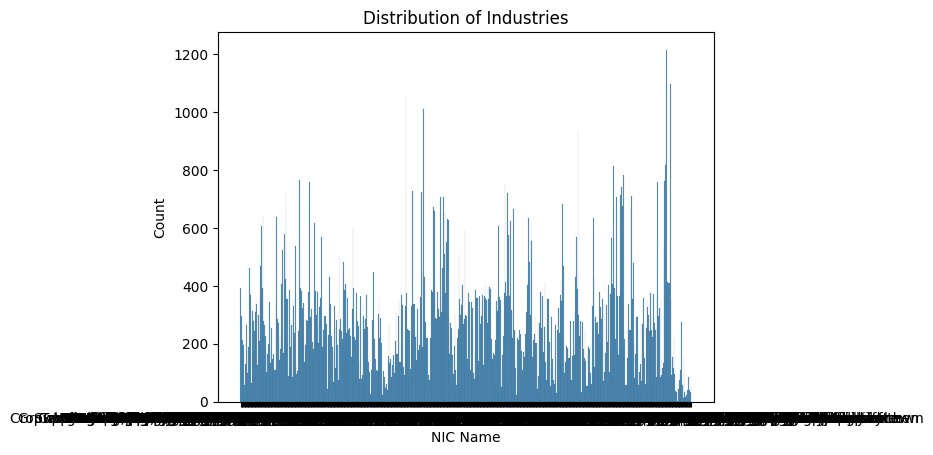

In [35]:
sns.histplot(df['NIC Name'], bins=30)
plt.title('Distribution of Industries')
plt.show()

In [36]:
# Remove duplicate rows from the DataFrame
df = df.drop_duplicates()

# Confirm the removal of duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (161515, 26)


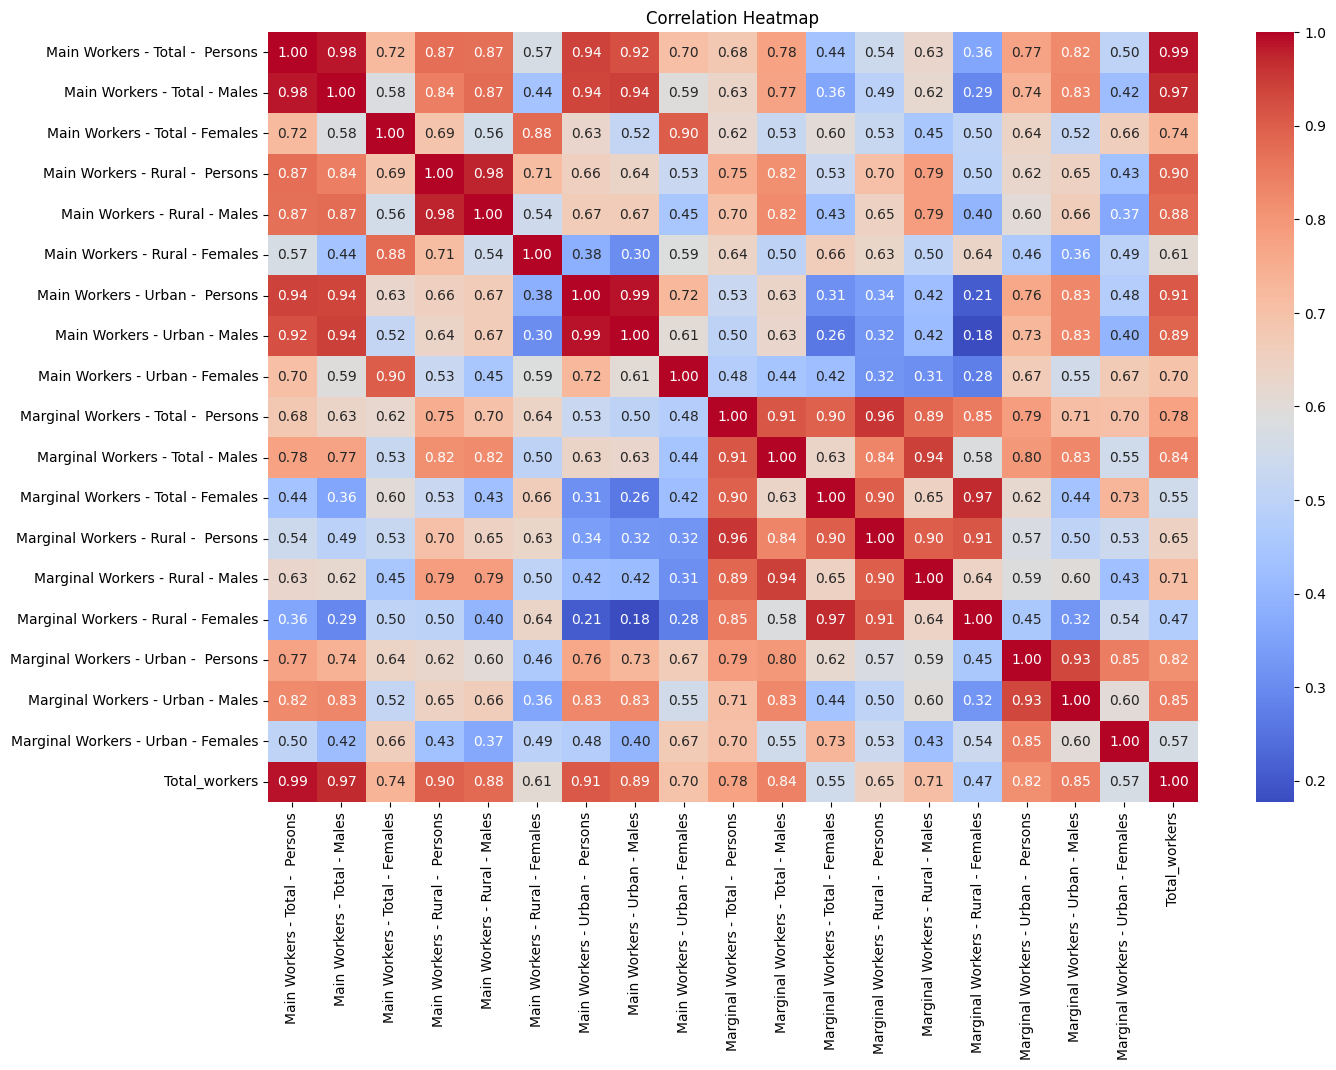

In [37]:
df_corr=df.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df[df_corr].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anupama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anupama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


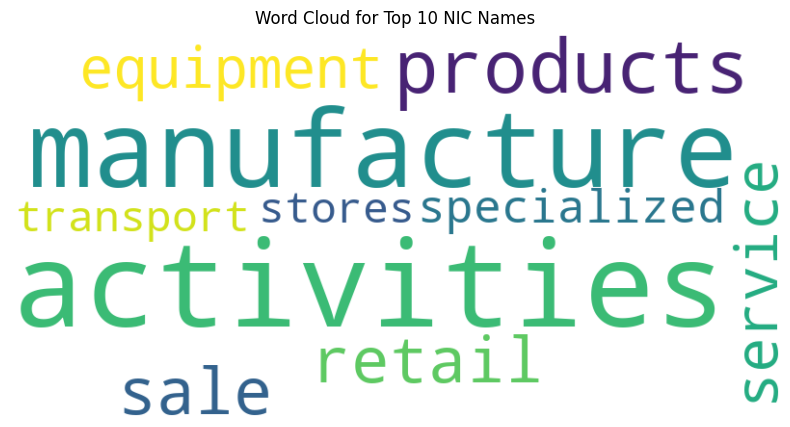

In [38]:
# Tokenize and Clean Text Data

import os
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')


# Tokenize and clean text data
text = ' '.join(df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
top_words = word_freq.most_common(10)

# Create a word cloud using the top words
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))

# Display the word cloud
plt.figure(figsize=(20, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Top 10 NIC Names')
plt.axis('off')
plt.show()

In [41]:
# Extract the top 10 most common words and their frequencies
top_words = [pair[0] for pair in word_freq.most_common(10)]
word_counts = [pair[1] for pair in word_freq.most_common(10)]

In [44]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Anupama\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anupama\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[('activities', 49392), ('manufacture', 38956), ('products', 15153), ('sale', 11114), ('retail', 10623), ('service', 8855), ('equipment', 8148), ('specialized', 7330), ('stores', 6558), ('transport', 6453)]


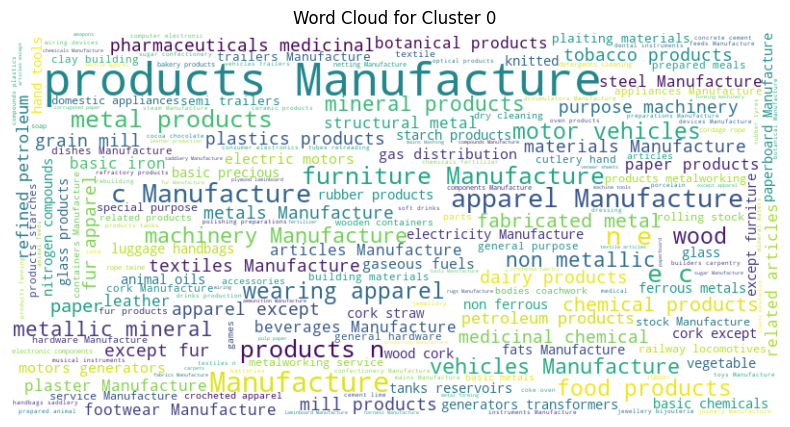

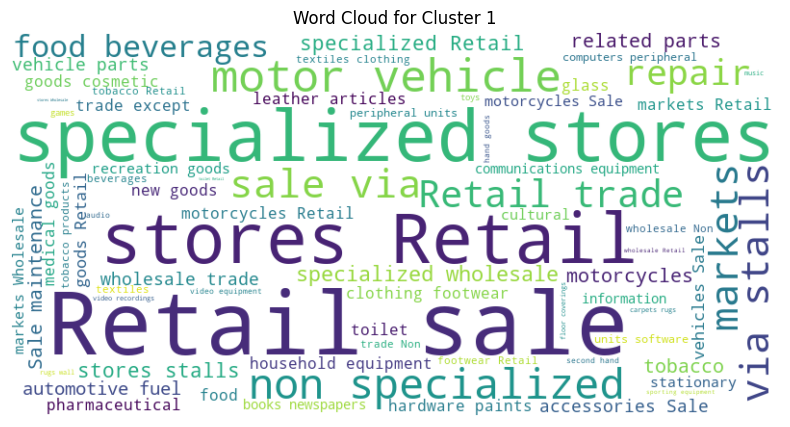

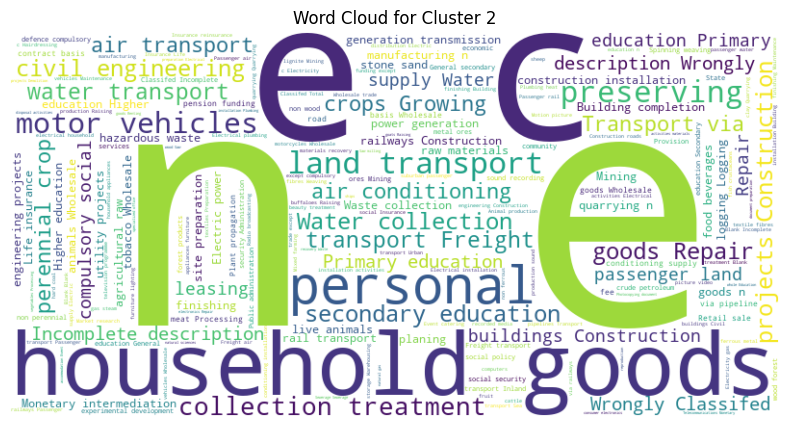

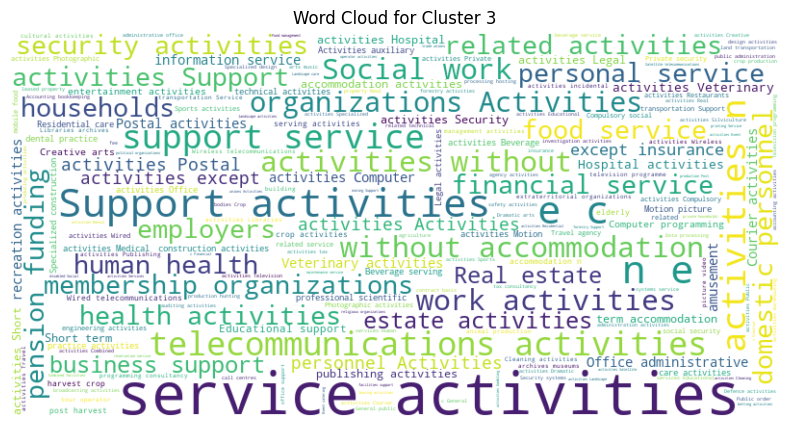

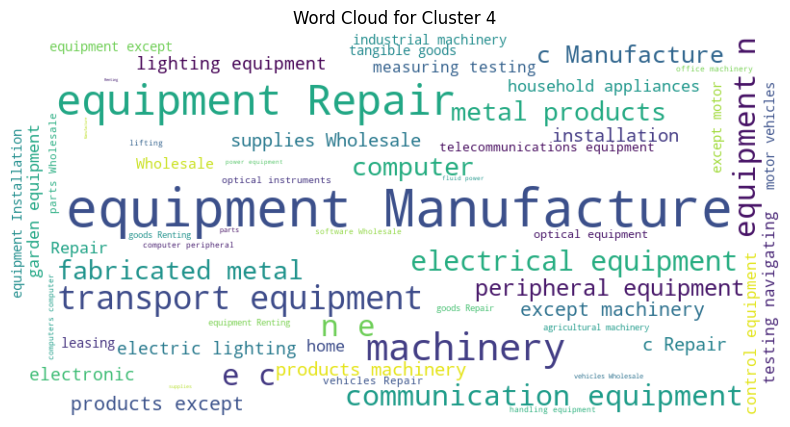

In [45]:
# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Function to merge CSV files in a folder
def load_data(data_path):
    # replace with your folder's path
    folder_path = r"D:/Task/State_data/"

    all_files = os.listdir(folder_path)

    # Filter out non-CSV files
    csv_files = [f for f in all_files if f.endswith('.csv')]

    # Create a list to hold the dataframes
    df_list = []

    for csv in csv_files:
        file_path = os.path.join(folder_path, csv)
        try:
            # Try reading the file using default UTF-8 encoding
            df = pd.read_csv(file_path)
            df_list.append(df)
        except UnicodeDecodeError:
            try:
                # If UTF-8 fails, try reading the file using UTF-16 encoding with tab separator
                df = pd.read_csv(file_path, encoding='cp1252')
                df_list.append(df)
            except Exception as e:
                print(f"Could not read file {csv} because of error: {e}")
        except Exception as e:
            print(f"Could not read file {csv} because of error: {e}")

    # Concatenate all data into one DataFrame
    big_df = pd.concat(df_list, ignore_index=True)
    
    # Save the final result to a new CSV file
    big_df.to_csv(os.path.join(folder_path, 'combined.csv'), index=False)

    return pd.read_csv(data_path)


# Tokenize and clean text data
text = ' '.join(df['NIC Name'])
tokens = word_tokenize(text)
tokens = [word.lower() for word in tokens if word.isalpha()]
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]

# Count word frequency
word_freq = Counter(tokens)
print(word_freq.most_common(10))

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['NIC Name'])

# KMeans Clustering
num_clusters = 5  # Adjust the number of clusters as needed
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_tfidf)

# Generate word clouds for each cluster
for cluster in range(num_clusters):
    text_for_cluster = df[df['Cluster'] == cluster]['NIC Name']
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_for_cluster))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Cluster {cluster}')
    plt.axis('off')
    plt.show()

In [48]:
# Vectorize the Text Data

from sklearn.feature_extraction.text import TfidfVectorizer
# Vectorize the 'NIC Name' column using TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
nic_name_tfidf = vectorizer.fit_transform(df['NIC Name'])
print(nic_name_tfidf )

  (0, 144)	0.4269584378466144
  (0, 23)	0.4251441491212852
  (0, 478)	0.3964775575159173
  (0, 299)	0.4965132194201135
  (0, 514)	0.34613466371283225
  (0, 559)	0.29295262423459284
  (0, 4)	0.1661585648628253
  (1, 272)	0.47688530988508837
  (1, 400)	0.4171517423728261
  (1, 430)	0.5642764249797451
  (1, 145)	0.5292985369932516
  (2, 272)	0.2829181909057714
  (2, 145)	0.31401299522370696
  (2, 89)	0.4111332514278763
  (2, 531)	0.3810917663327461
  (2, 328)	0.4111332514278763
  (2, 407)	0.4111332514278763
  (2, 557)	0.4111332514278763
  (3, 272)	0.5960815598943242
  (3, 531)	0.8029238905113916
  (4, 272)	0.3349390550470207
  (4, 663)	0.40426733614650623
  (4, 368)	0.4913870675035505
  (4, 537)	0.4913870675035505
  (4, 649)	0.4913870675035505
  :	:
  (161509, 654)	0.5147024397573183
  (161509, 477)	0.5147024397573183
  (161509, 295)	0.4165185825319093
  (161510, 559)	0.27985108440079715
  (161510, 4)	0.1587275576753513
  (161510, 475)	0.43950426666353654
  (161510, 654)	0.514702439757318

In [49]:
# Apply Clustering Algorithm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
# Step 2: Scale the numerical columns for clustering
scaler = StandardScaler()
numerical_columns = [
    'Main Workers - Total -  Persons', 'Main Workers - Total - Males', 'Main Workers - Total - Females',
    'Main Workers - Rural -  Persons', 'Main Workers - Rural - Males', 'Main Workers - Rural - Females',
    'Main Workers - Urban -  Persons', 'Main Workers - Urban - Males', 'Main Workers - Urban - Females',
    'Marginal Workers - Total -  Persons', 'Marginal Workers - Total - Males', 'Marginal Workers - Total - Females',
    'Marginal Workers - Rural -  Persons', 'Marginal Workers - Rural - Males', 'Marginal Workers - Rural - Females',
    'Marginal Workers - Urban -  Persons', 'Marginal Workers - Urban - Males', 'Marginal Workers - Urban - Females'
]
numerical_data_scaled = scaler.fit_transform(df[numerical_columns])

# Step 3: Combine TF-IDF features with scaled numerical data
from scipy.sparse import hstack
combined_features = hstack([nic_name_tfidf, numerical_data_scaled])

# Step 4: Determine the number of clusters and fit the KMeans model
num_clusters = 5
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
df['Cluster'] = kmeans.fit_predict(combined_features)

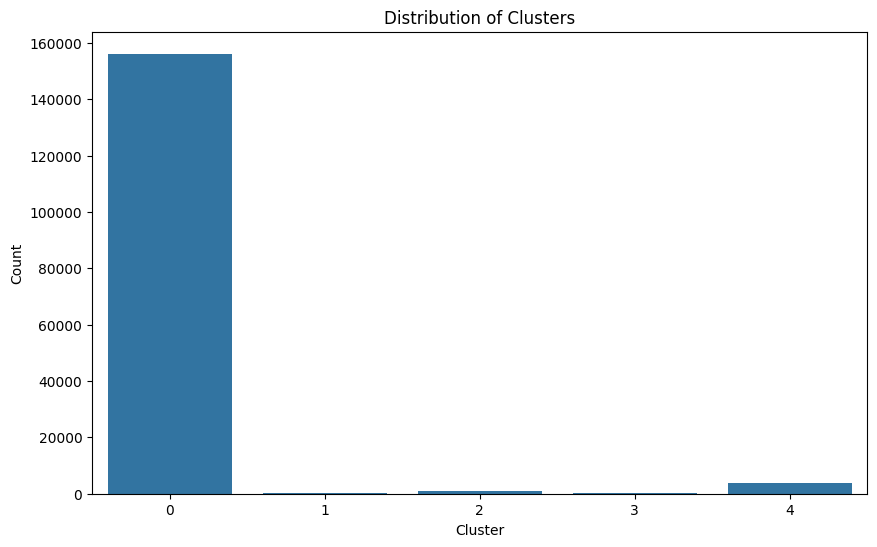

In [51]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.countplot(x='Cluster', data=df)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

In [52]:
# Identify Top 10 Most Frequent 'NIC Name' Categories

# Count the frequency of each 'NIC Name'
nic_name_counts = df['NIC Name'].value_counts()

# Get the top 10 most frequent 'NIC Name' categories
top_10_nic_names = nic_name_counts.head(10).index.tolist()

In [57]:
# Filter the DataFrame to Include Only Top 10 'NIC Name' Categories

# Filter the DataFrame to include only rows where 'NIC Name' is in the top 10 most frequent categories
top_10_df = df[df['NIC Name'].isin(top_10_nic_names)]

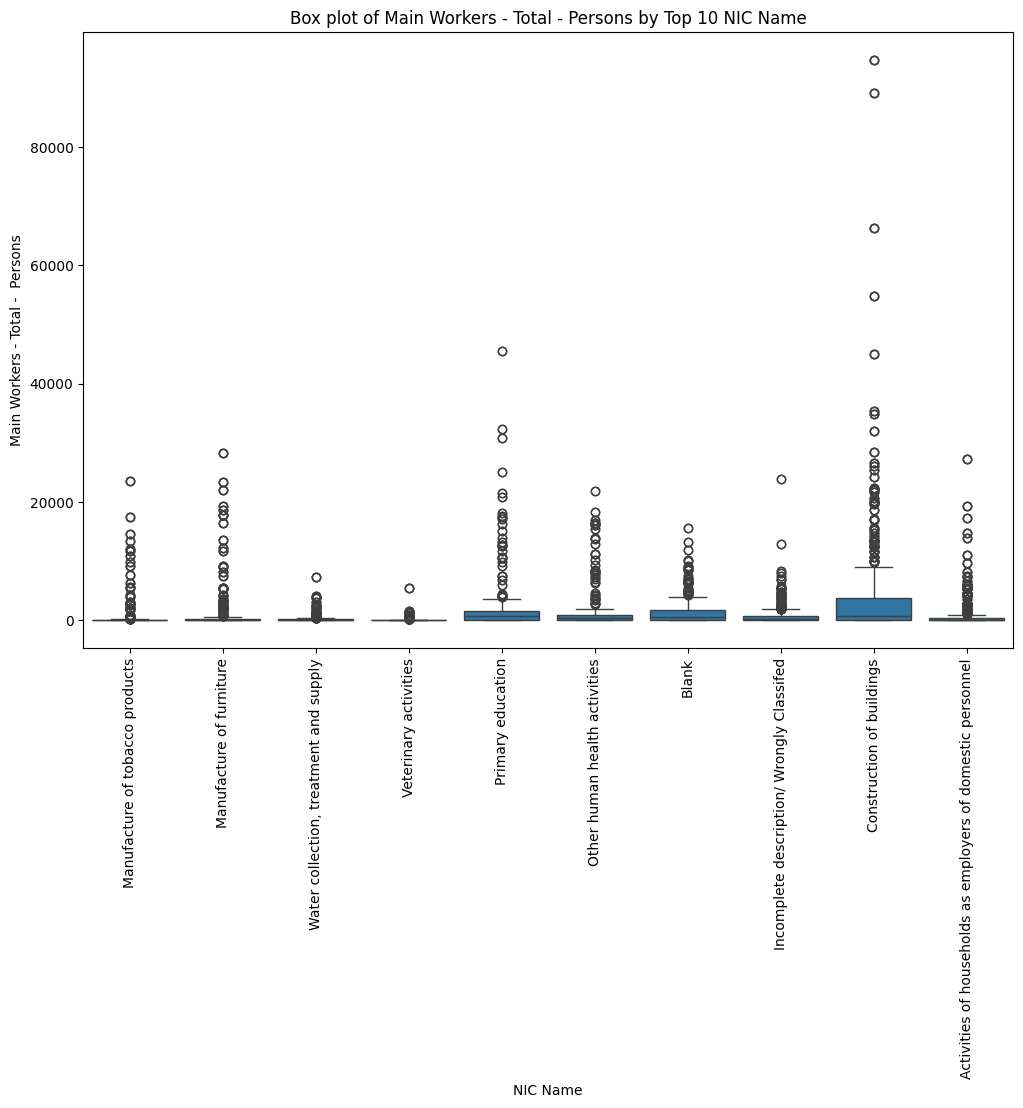

In [58]:
# Create the Box Plot
# Box plot for 'Main Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Main Workers - Total -  Persons', data=top_10_df)
plt.title('Box plot of Main Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

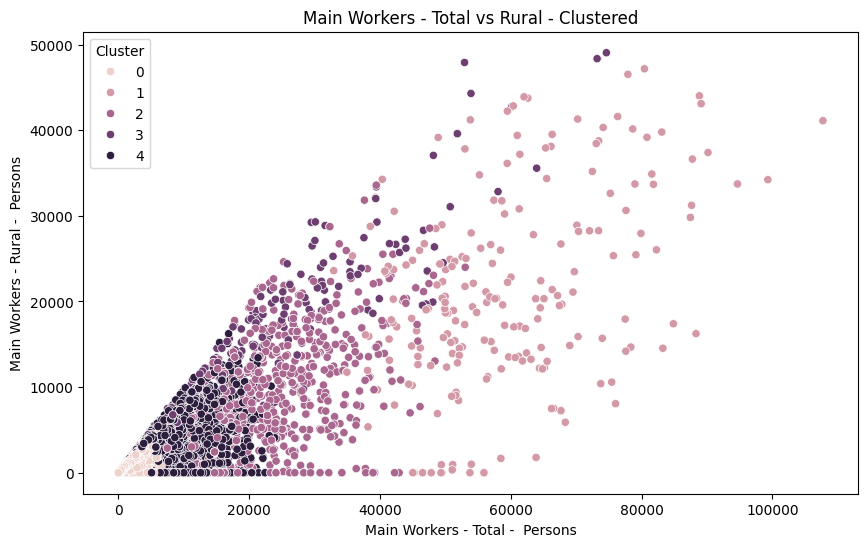

In [59]:
# Create Scatter Plots for Main Workers - Total - Persons
# Plot: Main Workers - Total - Persons vs Main Workers - Rural - Persons
# Scatter plot for 'Main Workers - Total - Persons' vs 'Main Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Main Workers - Total -  Persons', y='Main Workers - Rural -  Persons', hue='Cluster', data=df)
plt.title('Main Workers - Total vs Rural - Clustered')
plt.xlabel('Main Workers - Total -  Persons')
plt.ylabel('Main Workers - Rural -  Persons')
plt.show()


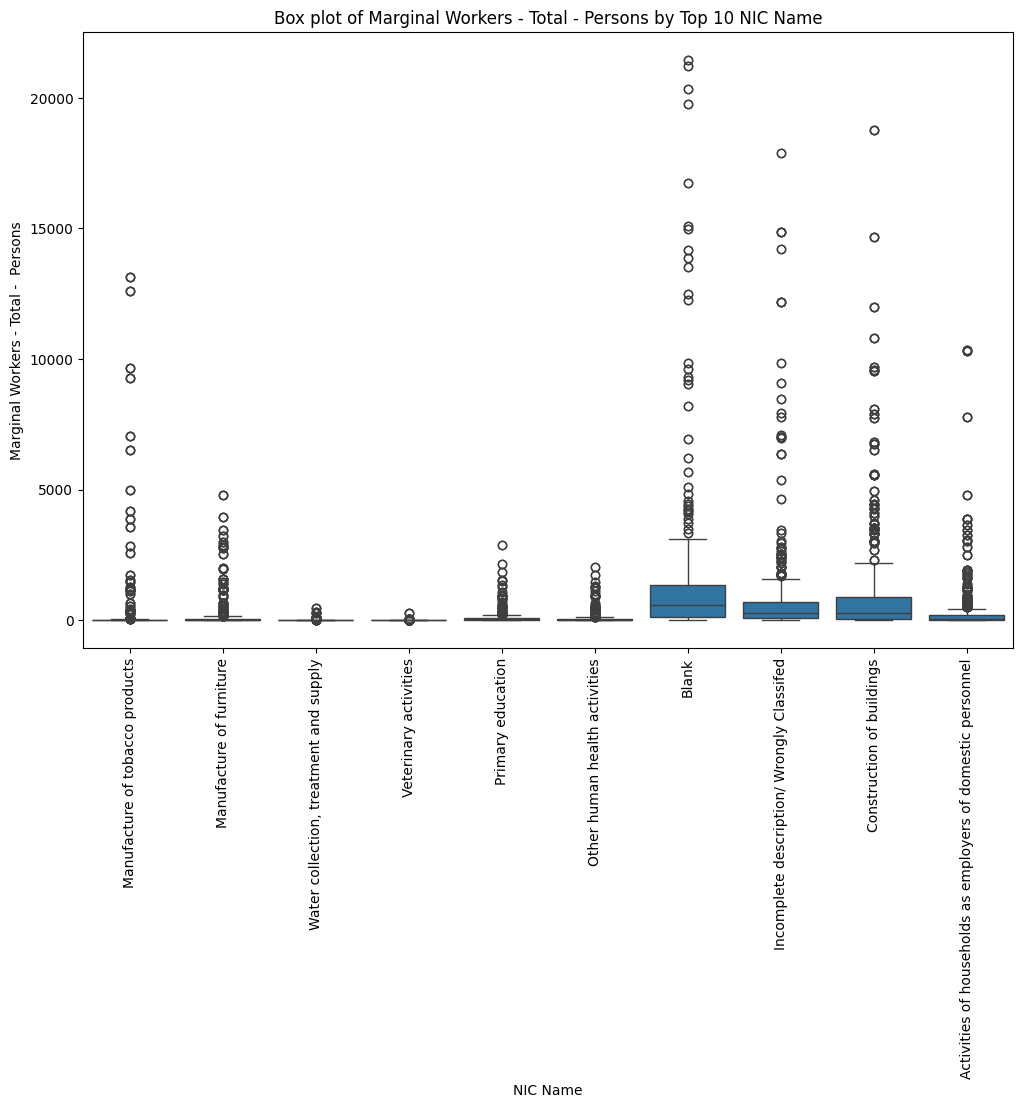

In [60]:
# Create the Box Plot for Marginal Workers - Total - Persons

# Box plot for 'Marginal Workers - Total - Persons' based on top 10 'NIC Name'
plt.figure(figsize=(12, 8))
sns.boxplot(x='NIC Name', y='Marginal Workers - Total -  Persons', data=top_10_df)
plt.title('Box plot of Marginal Workers - Total - Persons by Top 10 NIC Name')
plt.xticks(rotation=90)
plt.show()

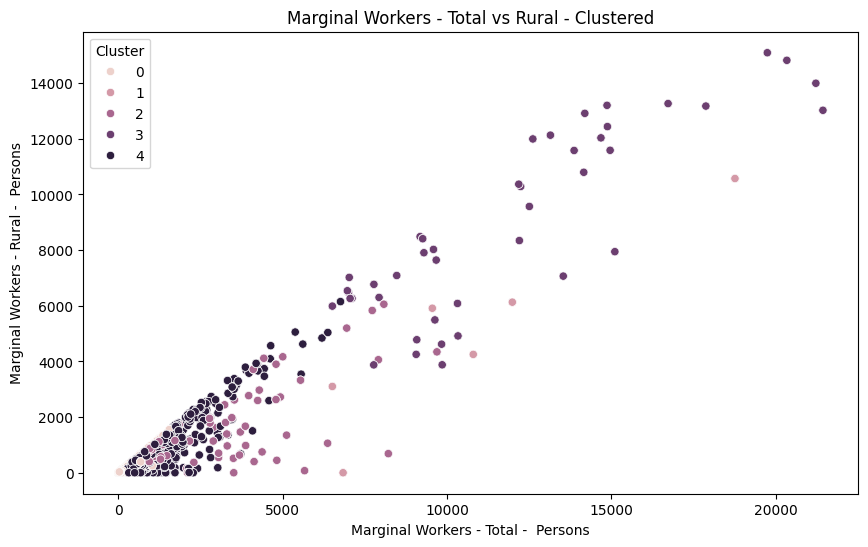

In [61]:
# Create Scatter Plots for Marginal Workers - Total - Persons
# Plot: Marginal Workers - Total - Persons vs Marginal Workers - Rural - Persons
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Rural - Persons'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Rural -  Persons', hue='Cluster', data=top_10_df)
plt.title('Marginal Workers - Total vs Rural - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Rural -  Persons')
plt.show()

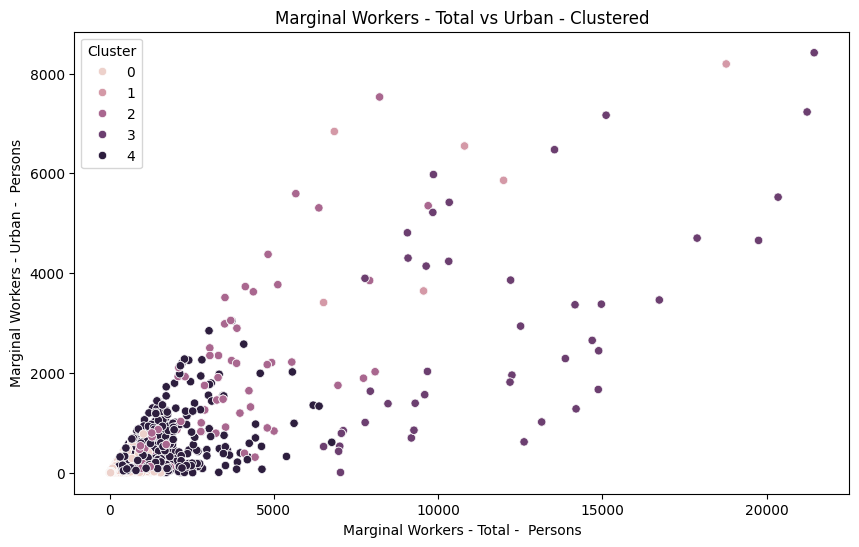

In [62]:
# Scatter plot for 'Marginal Workers - Total - Persons' vs 'Marginal Workers - Urban - Persons'

plt.figure(figsize=(10, 6))
sns.scatterplot(x='Marginal Workers - Total -  Persons', y='Marginal Workers - Urban -  Persons', hue='Cluster', data=top_10_df)
plt.title('Marginal Workers - Total vs Urban - Clustered')
plt.xlabel('Marginal Workers - Total -  Persons')
plt.ylabel('Marginal Workers - Urban -  Persons')
plt.show()

In [63]:
# Model building

import pandas as pd

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(df)
print("Columns with non-numeric values:", non_numeric_columns)

Columns with non-numeric values: ['State Code', 'District Code', 'India/States', 'Division', 'Group', 'Class', 'NIC Name']


In [64]:
#  Remove backticks from the 'Class' column
df['Class'] = df['Class'].str.replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [65]:
# Initialize an instance of TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the 'NIC Name' column to convert text data into numerical vectors
X_nic_name = tfidf_vectorizer.fit_transform(df['NIC Name'])

# Define columns to encode
columns_to_encode = ['State Code', 'District Code','India/States', 'Division', 'Group','NIC Name']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Encode categorical columns
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# Check data types after encoding
print(df.dtypes)

# Now, X_nic_name contains the TF-IDF transformed 'NIC Name' data, and merged_df_encoded contains the encoded categorical variables.

State Code                             int32
District Code                          int32
India/States                           int32
Division                               int32
Group                                  int32
Class                                  int64
NIC Name                               int32
Main Workers - Total -  Persons        int64
Main Workers - Total - Males           int64
Main Workers - Total - Females         int64
Main Workers - Rural -  Persons        int64
Main Workers - Rural - Males           int64
Main Workers - Rural - Females         int64
Main Workers - Urban -  Persons        int64
Main Workers - Urban - Males           int64
Main Workers - Urban - Females         int64
Marginal Workers - Total -  Persons    int64
Marginal Workers - Total - Males       int64
Marginal Workers - Total - Females     int64
Marginal Workers - Rural -  Persons    int64
Marginal Workers - Rural - Males       int64
Marginal Workers - Rural - Females     int64
Marginal W

In [74]:
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Remove backticks from the 'Class' column
df['Class'] = df['Class'].replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

In [77]:
# Assuming 'Class' is the target variable
X = df.drop(columns=['Class'])  # Features
y = df['Class']  # Target

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)
# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R² score:', r2_score(y_test, y_pred))

Mean Absolute Error: 1881.2098508286588
Mean Squared Error: 6004996.165719637
Root Mean Squared Error: 2450.509368625151
R² score: 0.3592726779256763


In [118]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, FunctionTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Check for non-numeric values in a DataFrame
def check_non_numeric(df):
    non_numeric_cols = []
    for col in df.columns:
        try:
            pd.to_numeric(df[col])
        except ValueError:
            non_numeric_cols.append(col)
    return non_numeric_cols

# Call the function to check for non-numeric values
non_numeric_columns = check_non_numeric(df)
print("Columns with non-numeric values:", non_numeric_columns)

# Remove backticks from the 'Class' column
df['Class'] = df['Class'].replace('`', '')

# Convert 'Class' column to numeric
df['Class'] = pd.to_numeric(df['Class'], errors='coerce')

# Define columns to encode
categorical_features = ['State Code', 'District Code', 'India/States', 'Division', 'Group']
text_column = 'NIC Name'

# Define preprocessing steps for categorical features and text column
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
text_transformer = TfidfVectorizer(stop_words='english')

# Create a preprocessor to apply transformations to appropriate columns
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('text', text_transformer, text_column)
    ])

# Define the model pipeline
Model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

Columns with non-numeric values: []
